# Additive Functionals


<a id='index-0'></a>

## Contents

- [Additive Functionals](#Additive-Functionals)  
  - [Overview](#Overview)  
  - [A Particular Additive Functional](#A-Particular-Additive-Functional)  
  - [Dynamics](#Dynamics)  
  - [Code](#Code)  

Co-authored with Chase Coleman and Balint Szoke

## Overview

Some time series are nonstationary

For example, output, prices, and dividends are typically nonstationary, due to irregular but persistent growth

Which kinds of models are useful for studying such time series?

Hansen and Scheinkman [[HS09]](https://lectures.quantecon.org/jl/zreferences.html#hans-scheink-2009) analyze two classes of time series models that accommodate growth

They are:

1. **additive functionals** that display random “arithmetic growth”  
1. **multiplicative functionals** that display random “geometric growth”  


These two classes of processes are closely connected

For example, if a process $ \{y_t\} $ is an additive functional and $ \phi_t = \exp(y_t) $, then $ \{\phi_t\} $ is a multiplicative functional

Hansen and Sargent [[HS17]](https://lectures.quantecon.org/jl/zreferences.html#hans-sarg-book-2016) (chs. 5 and 6) describe discrete time versions of additive and multiplicative functionals

In this lecture we discuss the former (i.e., additive functionals)

In the [next lecture](https://lectures.quantecon.org/jl/multiplicative_functionals.html) we discuss multiplicative functionals

We also consider fruitful decompositions of additive and multiplicative processes, a more in depth discussion of which can be found in Hansen and Sargent [[HS17]](https://lectures.quantecon.org/jl/zreferences.html#hans-sarg-book-2016)

## A Particular Additive Functional

This lecture focuses on a particular type of additive functional: a scalar process $ \{y_t\}_{t=0}^\infty $ whose increments are driven by a Gaussian vector autoregression

It is simple to construct, simulate, and analyze

This additive functional consists of two components, the first of which is a **first-order vector autoregression** (VAR)


<a id='equation-old1-additive-functionals'></a>
$$
x_{t+1} = A x_t + B z_{t+1} \tag{1}
$$

Here

- $ x_t $ is an $ n \times 1 $ vector,  
- $ A $ is an $ n \times n $ stable matrix (all eigenvalues lie within the open unit circle),  
- $ z_{t+1} \sim {\cal N}(0,I) $ is an $ m \times 1 $ i.i.d. shock,  
- $ B $ is an $ n \times m $ matrix, and  
- $ x_0 \sim {\cal N}(\mu_0, \Sigma_0) $ is a random initial condition for $ x $  


The second component is an equation that expresses increments
of $ \{y_t\}_{t=0}^\infty $ as linear functions of

- a scalar constant $ \nu $,  
- the vector $ x_t $, and  
- the same Gaussian vector $ z_{t+1} $ that appears in the VAR [(1)](#equation-old1-additive-functionals)  


In particular,


<a id='equation-old2-additive-functionals'></a>
$$
y_{t+1} - y_{t} = \nu + D x_{t} + F z_{t+1} \tag{2}
$$

Here $ y_0 \sim {\cal N}(\mu_{y0}, \Sigma_{y0}) $ is a random
initial condition

The nonstationary random process $ \{y_t\}_{t=0}^\infty $ displays
systematic but random *arithmetic growth*

### A linear state space representation

One way to represent the overall dynamics is to use a [linear state space system](https://lectures.quantecon.org/jl/linear_models.html)

To do this, we set up state and observation vectors

$$
\hat{x}_t = \begin{bmatrix} 1 \\  x_t \\ y_t  \end{bmatrix}
\quad \text{and} \quad
\hat{y}_t = \begin{bmatrix} x_t \\ y_t  \end{bmatrix}
$$

Now we construct the state space system

$$
\begin{bmatrix}
     1 \\
     x_{t+1} \\
     y_{t+1}
 \end{bmatrix}
 =
 \begin{bmatrix}
    1 & 0 & 0  \\
    0  & A & 0 \\
    \nu & D' &  1 \\
\end{bmatrix}
\begin{bmatrix}
    1 \\
    x_t \\
    y_t
\end{bmatrix} +
\begin{bmatrix}
    0 \\  B \\ F'
\end{bmatrix}
z_{t+1}
$$

$$
\begin{bmatrix}
    x_t \\
    y_t
\end{bmatrix}
= \begin{bmatrix}
    0  & I & 0  \\
    0 & 0  & 1
\end{bmatrix}
\begin{bmatrix}
    1 \\  x_t \\ y_t
\end{bmatrix}
$$

This can be written as

$$
\begin{aligned}
  \hat{x}_{t+1} &= \hat{A} \hat{x}_t + \hat{B} z_{t+1} \\
  \hat{y}_{t} &= \hat{D} \hat{x}_t
\end{aligned}
$$

which is a standard linear state space system

To study it, we could map it into an instance of [LSS](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lss.jl) from [QuantEcon.jl](http://quantecon.org/julia_index.html)

We will in fact use a different set of code for simulation, for reasons described below

## Dynamics

Let’s run some simulations to build intuition


<a id='addfunc-eg1'></a>
In doing so we’ll assume that $ z_{t+1} $ is scalar and that $ \tilde x_t $ follows a 4th-order scalar autoregession


<a id='equation-ftaf'></a>
$$
\tilde x_{t+1} = \phi_1 \tilde x_{t} + \phi_2 \tilde x_{t-1} +
\phi_3 \tilde x_{t-2} +
\phi_4 \tilde x_{t-3} + \sigma z_{t+1} \tag{3}
$$

Let the increment in $ \{y_t\} $ obey

$$
y_{t+1} - y_t =  \nu + \tilde x_t + \sigma z_{t+1}
$$

with an initial condition for $ y_0 $

While [(3)](#equation-ftaf) is not a first order system like [(1)](#equation-old1-additive-functionals), we know that it can be mapped  into a first order system

- for an example of such a mapping, see [this example](https://lectures.quantecon.org/jl/linear_models.html#lss-sode)  


In fact this whole model can be mapped into the additive functional system definition in [(1)](#equation-old1-additive-functionals) – [(2)](#equation-old2-additive-functionals)  by appropriate selection of the matrices $ A, B, D, F $

You can try writing these matrices down now as an exercise — the correct expressions will appear in the code below

### Simulation

When simulating we embed our variables into a bigger system

This system also constructs the components of the decompositions of $ y_t $ and of $ \exp(y_t) $ proposed by Hansen and Scheinkman [[HS09]](https://lectures.quantecon.org/jl/zreferences.html#hans-scheink-2009)

All of these objects are computed using the code below

### Setup

In [1]:
using InstantiateFromURL
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.5");

In [2]:
using LinearAlgebra, Statistics, Compat

In [3]:
using Distributions, Parameters, Plots, QuantEcon
gr(fmt = :png);

In [4]:
function AMF_LSS_VAR(A, B, D, F = nothing; ν = nothing)

    if B isa AbstractVector
        B = reshape(B, length(B), 1)
    end
    # unpack required elements
    nx, nk = size(B)

    # checking the dimension of D (extended from the scalar case)
    if ndims(D) > 1
        nm = size(D, 1)
        if D isa Union{Adjoint, Transpose}
            D = convert(Matrix, D)
        end
    else
        nm = 1
        D = reshape(D, 1, length(D))
    end

    # set F
    if F === nothing
        F = zeros(nk, 1)
    elseif ndims(F) == 1
        F = reshape(F, length(F), 1)
    end

    # set ν
    if ν === nothing
        ν = zeros(nm, 1)
    elseif ndims(ν) == 1
        ν = reshape(ν, length(ν), 1)
    else
        throw(ArgumentError("ν must be column vector!"))
    end

    if size(ν, 1) != size(D, 1)
        error("The size of ν is inconsistent with D!")
    end

    # construct BIG state space representation
    lss = construct_ss(A, B, D, F, ν, nx, nk, nm)

    return (A = A, B = B, D = D, F = F, ν = ν, nx = nx, nk = nk, nm = nm, lss = lss)
end

AMF_LSS_VAR(A, B, D) =
    AMF_LSS_VAR(A, B, D, nothing, ν=nothing)
AMF_LSS_VAR(A, B, D, F, ν) =
    AMF_LSS_VAR(A, B, D, [F], ν=[ν])

function construct_ss(A, B, D, F,
                    ν, nx, nk, nm)

    H, g = additive_decomp(A, B, D, F, nx)

    # auxiliary blocks with 0's and 1's to fill out the lss matrices
    nx0c = zeros(nx, 1)
    nx0r = zeros(1, nx)
    nx1 = ones(1, nx)
    nk0 = zeros(1, nk)
    ny0c = zeros(nm, 1)
    ny0r = zeros(1, nm)
    ny1m = I + zeros(nm, nm)
    ny0m = zeros(nm, nm)
    nyx0m = similar(D)

    # build A matrix for LSS
    # order of states is: [1, t, xt, yt, mt]
    A1 = hcat(1, 0, nx0r, ny0r, ny0r)          # transition for 1
    A2 = hcat(1, 1, nx0r, ny0r, ny0r)          # transition for t
    A3 = hcat(nx0c, nx0c, A, nyx0m', nyx0m')   # transition for x_{t+1}
    A4 = hcat(ν, ny0c, D, ny1m, ny0m)          # transition for y_{t+1}
    A5 = hcat(ny0c, ny0c, nyx0m, ny0m, ny1m)   # transition for m_{t+1}
    Abar = vcat(A1, A2, A3, A4, A5)

    # build B matrix for LSS
    Bbar = vcat(nk0, nk0, B, F, H)

    # build G matrix for LSS
    # order of observation is: [xt, yt, mt, st, tt]
    G1 = hcat(nx0c, nx0c, I, nyx0m', nyx0m')          # selector for x_{t}
    G2 = hcat(ny0c, ny0c, nyx0m, ny1m, ny0m)          # selector for y_{t}
    G3 = hcat(ny0c, ny0c, nyx0m, ny0m, ny1m)          # selector for martingale
    G4 = hcat(ny0c, ny0c, -g, ny0m, ny0m)             # selector for stationary
    G5 = hcat(ny0c, ν, nyx0m, ny0m, ny0m)             # selector for trend
    Gbar = vcat(G1, G2, G3, G4, G5)

    # build LSS type
    x0 = hcat(1, 0, nx0r, ny0r, ny0r)
    S0 = zeros(length(x0), length(x0))
    lss = LSS(Abar, Bbar, Gbar, zeros(nx+4nm, 1), x0, S0)

    return lss
end

function additive_decomp(A, B, D, F, nx)
    A_res = \(I - A, I)
    g = D * A_res
    H = F .+ D * A_res * B

    return H, g
end

function multiplicative_decomp(A, B, D, F, ν, nx)
    H, g = additive_decomp(A, B, D, F, nx)
    ν_tilde = ν .+ 0.5 * diag(H * H')

    return H, g, ν_tilde
end

function loglikelihood_path(amf, x, y)
    @unpack A, B, D, F = amf
    k, T = size(y)
    FF = F * F'
    FFinv = inv(FF)
    temp = y[:, 2:end]-y[:, 1:end-1] - D*x[:, 1:end-1]
    obs =  temp .* FFinv .* temp
    obssum = cumsum(obs)
    scalar = (logdet(FF) + k * log(2π)) * (1:T)

    return -(obssum + scalar) / 2
end

function loglikelihood(amf, x, y)
    llh = loglikelihood_path(amf, x, y)

    return llh[end]
end

function plot_additive(amf, T; npaths = 25, show_trend = true)

    # pull out right sizes so we know how to increment
    @unpack nx, nk, nm = amf

    # allocate space (nm is the number of additive functionals - we want npaths for each)
    mpath = zeros(nm*npaths, T)
    mbounds = zeros(2nm, T)
    spath = zeros(nm*npaths, T)
    sbounds = zeros(2nm, T)
    tpath = zeros(nm*npaths, T)
    ypath = zeros(nm*npaths, T)

    # simulate for as long as we wanted
    moment_generator = moment_sequence(amf.lss)

    # pull out population moments
    for (t, x) in enumerate(moment_generator)
        ymeans = x[2]
        yvar = x[4]

        # lower and upper bounds - for each additive functional
        for ii in 1:nm
            li, ui = 2(ii - 1) + 1, 2ii
            if sqrt(yvar[nx + nm + ii, nx + nm + ii]) != 0.0
                madd_dist = Normal(ymeans[nx + nm + ii], sqrt(yvar[nx + nm + ii, nx + nm + ii]))
                mbounds[li, t] = quantile(madd_dist, 0.01)
                mbounds[ui, t] = quantile(madd_dist, 0.99)
            elseif sqrt(yvar[nx + nm + ii, nx + nm + ii]) == 0.0
                mbounds[li, t] = ymeans[nx + nm + ii]
                mbounds[ui, t] = ymeans[nx + nm + ii]
            else
                error("standard error is negative")
            end

            if sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]) != 0.0
                sadd_dist = Normal(ymeans[nx + 2nm + ii], sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]))
                sbounds[li, t] = quantile(sadd_dist, 0.01)
                sbounds[ui, t] = quantile(sadd_dist, 0.99)
            elseif sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]) == 0.0
                sbounds[li, t] = ymeans[nx + 2nm + ii]
                sbounds[ui, t] = ymeans[nx + 2nm + ii]
            else
                error("standard error is negative")
            end
        end
        t == T && break
    end

    # pull out paths
    for n in 1:npaths
        x, y = simulate(amf.lss,T)
        for ii in 0:nm - 1
            ypath[npaths * ii + n, :] = y[nx + ii + 1, :]
            mpath[npaths * ii + n, :] = y[nx + nm + ii + 1, :]
            spath[npaths * ii + n, :] = y[nx + 2nm + ii + 1, :]
            tpath[npaths * ii + n, :] = y[nx + 3nm + ii + 1, :]
        end
    end

    add_figs = []

    for ii in 0:nm-1
        li, ui = npaths*(ii), npaths*(ii + 1)
        LI, UI = 2ii, 2(ii + 1)
        push!(add_figs,
            plot_given_paths(T, ypath[li + 1:ui, :], mpath[li + 1:ui, :], spath[li + 1:ui, :],
                            tpath[li + 1:ui, :], mbounds[LI + 1:UI, :], sbounds[LI + 1:UI, :],
                            show_trend = show_trend))
    end
    return add_figs
end

function plot_multiplicative(amf, T, npaths = 25, show_trend = true)
    # pull out right sizes so we know how to increment
    @unpack nx, nk, nm = amf
    # matrices for the multiplicative decomposition
    H, g, ν_tilde = multiplicative_decomp(A, B, D, F, ν, nx)

    # allocate space (nm is the number of functionals - we want npaths for each)
    mpath_mult = zeros(nm * npaths, T)
    mbounds_mult = zeros(2nm, T)
    spath_mult = zeros(nm * npaths, T)
    sbounds_mult = zeros(2nm, T)
    tpath_mult = zeros(nm * npaths, T)
    ypath_mult = zeros(nm * npaths, T)

    # simulate for as long as we wanted
    moment_generator = moment_sequence(amf.lss)

    # pull out population moments
    for (t, x) in enumerate(moment_generator)
        ymeans = x[2]
        yvar = x[4]

        # lower and upper bounds - for each multiplicative functional
        for ii in 1:nm
            li, ui = 2(ii - 1)+1, 2ii
            if yvar[nx + nm + ii, nx + nm + ii] != 0.0
                Mdist = LogNormal(ymeans[nx + nm + ii]- 0.5t * diag(H * H')[ii],
                                sqrt(yvar[nx + nm + ii, nx + nm + ii]))
                mbounds_mult[li, t] = quantile(Mdist, 0.01)
                mbounds_mult[ui, t] = quantile(Mdist, 0.99)
            elseif yvar[nx + nm + ii, nx + nm + ii] == 0.0
                mbounds_mult[li, t] = exp.(ymeans[nx + nm + ii] - 0.5t * diag(H * H')[ii])
                mbounds_mult[ui, t] = exp.(ymeans[nx + nm + ii] - 0.5t * diag(H * H')[ii])
            else
                error("standard error is negative")
            end
            if yvar[nx + 2nm + ii, nx + 2nm + ii] != 0.0
                Sdist = LogNormal(-ymeans[nx + 2nm + ii],
                                sqrt(yvar[nx + 2nm + ii, nx + 2nm + ii]))
                sbounds_mult[li, t] = quantile(Sdist, 0.01)
                sbounds_mult[ui, t] = quantile(Sdist, 0.99)
            elseif yvar[nx + 2nm + ii, nx + 2nm + ii] == 0.0
                sbounds_mult[li, t] = exp.(-ymeans[nx + 2nm + ii])
                sbounds_mult[ui, t] = exp.(-ymeans[nx + 2nm + ii])
            else
                error("standard error is negative")
            end
        end
        t == T && break
    end

    # pull out paths
    for n in 1:npaths
        x, y = simulate(amf.lss,T)
        for ii in 0:nm-1
            ypath_mult[npaths * ii + n, :] = exp.(y[nx+ii+1, :])
            mpath_mult[npaths * ii + n, :] =
                exp.(y[nx+nm + ii+1, :] - collect(1:T)*0.5*diag(H * H')[ii+1])
            spath_mult[npaths * ii + n, :] = 1 ./exp.(-y[nx+2*nm + ii+1, :])
            tpath_mult[npaths * ii + n, :] =
                exp.(y[nx + 3nm + ii+1, :] + (1:T) * 0.5 * diag(H * H')[ii + 1])
        end
    end

    mult_figs = []

    for ii in 0:nm-1
        li, ui = npaths * ii, npaths * (ii + 1)
        LI, UI = 2ii, 2(ii + 1)
        push!(mult_figs,
            plot_given_paths(T, ypath_mult[li+1:ui, :], mpath_mult[li+1:ui, :],
                            spath_mult[li+1:ui, :], tpath_mult[li+1:ui, :],
                            mbounds_mult[LI+1:UI, :], sbounds_mult[LI+1:UI, :],
                            horline = 1.0, show_trend=show_trend))
    end

    return mult_figs
end

function plot_martingales(amf, T, npaths = 25)

    # pull out right sizes so we know how to increment
    @unpack A, B, D, F, ν, nx, nk, nm = amf
    # matrices for the multiplicative decomposition
    H, g, ν_tilde = multiplicative_decomp(A, B, D, F, ν, nx)

    # allocate space (nm is the number of functionals - we want npaths for each)
    mpath_mult = zeros(nm * npaths, T)
    mbounds_mult = zeros(2nm, T)

    # simulate for as long as we wanted
    moment_generator = moment_sequence(amf.lss)
    # pull out population moments
    for (t, x) in enumerate(moment_generator)
        ymeans = x[2]
        yvar = x[4]

        # lower and upper bounds - for each functional
        for ii in 1:nm
            li, ui = 2(ii - 1) + 1, 2ii
            if yvar[nx + nm + ii, nx + nm + ii] != 0.0
                Mdist = LogNormal(ymeans[nx + nm + ii] - 0.5^2 * t * diag(H * H')[ii],
                            sqrt(yvar[nx + nm + ii, nx + nm + ii]))
                mbounds_mult[li, t] = quantile(Mdist, 0.01)
                mbounds_mult[ui, t] = quantile(Mdist, 0.99)
            elseif yvar[nx + nm + ii, nx + nm + ii] == 0.0
                mbounds_mult[li, t] = ymeans[nx + nm + ii] - 0.5^2 * t * diag(H * H')[ii]
                mbounds_mult[ui, t] = ymeans[nx + nm + ii]- 0.5t * diag(H * H')[ii]
            else
                error("standard error is negative")
            end
        end
        t == T && break
    end

    # pull out paths
    for n in 1:npaths
        x, y = simulate(amf.lss, T)
        for ii in 0:nm-1
            mpath_mult[npaths * ii + n, :] =
                exp.(y[nx+nm + ii+1, :] - (1:T) * 0.5 * diag(H * H')[ii+1])
        end
    end

    mart_figs = []

    for ii in 0:nm-1
        li, ui = npaths*(ii), npaths*(ii + 1)
        LI, UI = 2ii, 2(ii + 1)
        push!(mart_figs,
            plot_martingale_paths(T, mpath_mult[li + 1:ui, :],
                                                    mbounds_mult[LI + 1:UI, :], horline = 1))
        plot!(mart_figs[ii + 1], title = "Martingale components for many paths of y_(ii + 1)")
    end

    return mart_figs
end

function plot_given_paths(T, ypath, mpath, spath, tpath, mbounds, sbounds;
                          horline = 0.0, show_trend = true)

    # allocate space
    trange = 1:T

    # allocate transpose
    mpathᵀ = Matrix(mpath')

    # create figure
    plots=plot(layout = (2, 2), size = (800, 800))

    # plot all paths together

    plot!(plots[1], trange, ypath[1, :], label = "y_t", color = :black)
    plot!(plots[1], trange, mpath[1, :], label = "m_t", color = :magenta)
    plot!(plots[1], trange, spath[1, :], label = "s_t", color = :green)
    if show_trend
        plot!(plots[1], trange, tpath[1, :], label = "t_t", color = :red)
    end
    plot!(plots[1], seriestype = :hline, [horline], color = :black, linestyle=:dash, label = "")
    plot!(plots[1], title = "One Path of All Variables", legend=:topleft)

    # plot martingale component
    plot!(plots[2], trange, mpath[1, :], color = :magenta, label = "")
    plot!(plots[2], trange, mpathᵀ, alpha = 0.45, color = :magenta, label = "")
    ub = mbounds[2, :]
    lb = mbounds[1, :]
    plot!(plots[2], ub, fill_between = (lb, ub), alpha = 0.25, color = :magenta, label = "")
    plot!(plots[2], seriestype = :hline, [horline], color = :black, linestyle =:dash, label = "")
    plot!(plots[2], title = "Martingale Components for Many Paths")

    # plot stationary component
    plot!(plots[3], spath[1, :], color = :green, label = "")
    plot!(plots[3], Matrix(spath'), alpha = 0.25, color = :green, label = "")
    ub = sbounds[2, :]
    lb = sbounds[1, :]
    plot!(plots[3], ub, fill_between = (lb, ub), alpha = 0.25, color = :green, label = "")
    plot!(plots[3], seriestype = :hline, [horline], color = :black, linestyle=:dash, label = "")
    plot!(plots[3], title = "Stationary Components for Many Paths")

    # plot trend component
    if show_trend == true
        plot!(plots[4], Matrix(tpath'), color = :red, label = "")
    end
    plot!(plots[4], seriestype = :hline, [horline], color = :black, linestyle =:dash, label = "")
    plot!(plots[4], title = "Trend Components for Many Paths")

    return plots
end

function plot_martingale_paths(T, mpath, mbounds;
                               horline = 1, show_trend = false)
    # allocate space
    trange = 1:T

    # create the plot
    plt = plot()

    # plot martingale component
    ub = mbounds[2, :]
    lb = mbounds[1, :]
    plot!(plt, lb, fill_between = (lb, ub), alpha = 0.25, color = :magenta, label = "")
    plot!(plt, seriestype = :hline, [horline], color = :black, linestyle =:dash, label = "")
    plot!(plt, trange, Matrix(mpath'), linewidth=0.25, color = :black, label = "")

    return plt
end

plot_martingale_paths (generic function with 1 method)

For now, we just plot $ y_t $ and $ x_t $, postponing until later a description of exactly how we compute them


<a id='addfunc-egcode'></a>

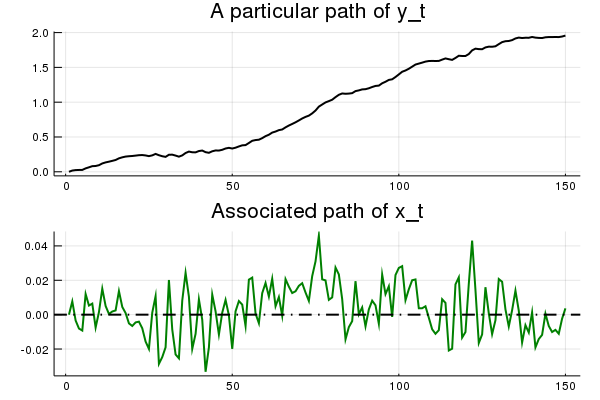

In [5]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.01
ν = 0.01 # growth rate

# A matrix should be n x n
A = [ϕ_1 ϕ_2 ϕ_3 ϕ_4;
       1   0   0   0;
       0   1   0   0;
       0   0   1   0]

# B matrix should be n x k
B = [σ, 0, 0, 0]

D = [1 0 0 0] * A
F = [1, 0, 0, 0] ⋅ vec(B)

amf = AMF_LSS_VAR(A, B, D, F, ν)

T = 150
x, y = simulate(amf.lss, T)

plots = plot(layout = (2, 1))

plot!(plots[1], 1:T, y[amf.nx + 1, :], color = :black, lw = 2, label = "")
plot!(plots[1], title =  "A particular path of y_t")
plot!(plots[2], 1:T, y[1, :], color = :green, lw = 2, label = "")
plot!(plots[2], seriestype = :hline, [0], color = :black, lw = 2, linestyle=:dashdot,
      label = "")
plot!(plots[2], title = "Associated path of x_t")

plot(plots)

Notice the irregular but persistent growth in $ y_t $

### Decomposition

Hansen and Sargent [[HS17]](https://lectures.quantecon.org/jl/zreferences.html#hans-sarg-book-2016) describe how to construct a decomposition of
an additive functional into four parts:

- a constant inherited from initial values $ x_0 $ and $ y_0 $  
- a linear trend  
- a martingale  
- an (asymptotically) stationary component  


To attain this decomposition for the particular class of additive
functionals defined by [(1)](#equation-old1-additive-functionals) and [(2)](#equation-old2-additive-functionals), we first construct the matrices

$$
\begin{aligned}
  H & := F + B'(I - A')^{-1} D
  \\
  g & := D' (I - A)^{-1}
\end{aligned}
$$

Then the Hansen-Scheinkman [[HS09]](https://lectures.quantecon.org/jl/zreferences.html#hans-scheink-2009) decomposition is

$$
\begin{aligned}
  y_t
  &= \underbrace{t \nu}_{\text{trend component}} +
     \overbrace{\sum_{j=1}^t H z_j}^{\text{Martingale component}} -
     \underbrace{g x_t}_{\text{stationary component}} +
     \overbrace{g x_0 + y_0}^{\text{initial conditions}}
\end{aligned}
$$

At this stage you should pause and verify that $ y_{t+1} - y_t $ satisfies [(2)](#equation-old2-additive-functionals)

It is convenient for us to introduce the following notation:

- $ \tau_t = \nu t $ , a linear, deterministic trend  
- $ m_t = \sum_{j=1}^t H z_j $, a martingale with time $ t+1 $ increment $ H z_{t+1} $  
- $ s_t = g x_t $, an (asymptotically) stationary component  


We want to characterize and simulate components $ \tau_t, m_t, s_t $ of the decomposition.

A convenient way to do this is to construct an appropriate instance of a [linear state space system](https://lectures.quantecon.org/jl/linear_models.html) by using [LSS](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lss.jl) from [QuantEcon.jl](http://quantecon.org/julia_index.html)

This will allow us to use the routines in [LSS](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lss.jl) to study dynamics

To start, observe that, under the dynamics in [(1)](#equation-old1-additive-functionals) and [(2)](#equation-old2-additive-functionals) and with the
definitions just given,

$$
\begin{bmatrix}
    1 \\
    t+1 \\
    x_{t+1} \\
    y_{t+1} \\
    m_{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & 0 & 0 & 0 \\
    1 & 1 & 0 & 0 & 0 \\
    0 & 0 & A & 0 & 0 \\
    \nu & 0 & D' & 1 & 0 \\
    0 & 0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    1 \\
    t \\
    x_t \\
    y_t \\
    m_t
\end{bmatrix}
+
\begin{bmatrix}
    0 \\
    0 \\
    B \\
    F' \\
    H'
\end{bmatrix}
z_{t+1}
$$

and

$$
\begin{bmatrix}
    x_t \\
    y_t \\
    \tau_t \\
    m_t \\
    s_t
\end{bmatrix}
=
\begin{bmatrix}
    0 & 0 & I & 0 & 0 \\
    0 & 0 & 0 & 1 & 0 \\
    0 & \nu & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 \\
    0 & 0 & -g & 0 & 0
\end{bmatrix}
\begin{bmatrix}
    1 \\
    t \\
    x_t \\
    y_t \\
    m_t
\end{bmatrix}
$$

With

$$
\tilde{x} := \begin{bmatrix} 1 \\ t \\ x_t \\ y_t \\ m_t \end{bmatrix}
\quad \text{and} \quad
\tilde{y} := \begin{bmatrix} x_t \\ y_t \\ \tau_t \\ m_t \\ s_t \end{bmatrix}
$$

we can write this as the linear state space system

$$
\begin{aligned}
  \tilde{x}_{t+1} &= \tilde{A} \tilde{x}_t + \tilde{B} z_{t+1} \\
  \tilde{y}_{t} &= \tilde{D} \tilde{x}_t
\end{aligned}
$$

By picking out components of $ \tilde y_t $, we can track all variables of
interest

## Code

The type [AMF_LSS_VAR](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/additive_functionals/amflss.jl) mentioned above does all that we want to study our additive functional

In fact [AMF_LSS_VAR](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/additive_functionals/amflss.jl) does more, as we shall explain below

(A hint that it does more is the name of the type – here AMF stands for
“additive and multiplicative functional” – the code will do things for
multiplicative functionals too)

Let’s use this code (embedded above) to explore the [example process described above](#addfunc-eg1)

If you run [the code that first simulated that example](#addfunc-egcode) again and then the method call
you will generate (modulo randomness) the plot

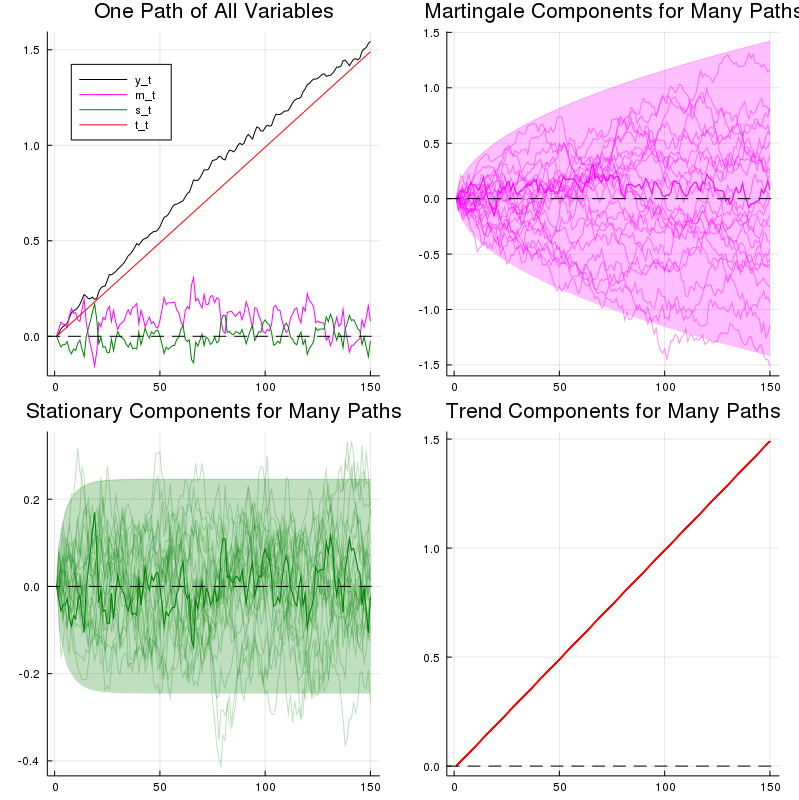

In [6]:
plt = plot_additive(amf, T)
plt[1]

When we plot multiple realizations of a component in the 2nd, 3rd, and 4th panels, we also plot population 95% probability coverage sets computed using the LSS type

We have chosen to simulate many paths, all starting from the *same* nonrandom initial conditions $ x_0, y_0 $ (you can tell this from the shape of the 95% probability coverage shaded areas)

Notice tell-tale signs of these probability coverage shaded areas

- the purple one for the martingale component $ m_t $ grows with
  $ \sqrt{t} $  
- the green one for the stationary component $ s_t $ converges to a
  constant band  

### An associated multiplicative functional

Where $ \{y_t\} $ is our additive functional, let $ M_t = \exp(y_t) $

As mentioned above, the process $ \{M_t\} $ is called a **multiplicative functional**

Corresponding to the additive decomposition described above we have the multiplicative decomposition of the $ M_t $

$$
\frac{M_t}{M_0}
= \exp (t \nu) \exp \Bigl(\sum_{j=1}^t H \cdot Z_j \Bigr) \exp \biggl( D'(I-A)^{-1} x_0 - D'(I-A)^{-1} x_t \biggr)
$$

or

$$
\frac{M_t}{M_0} =  \exp\left( \tilde \nu t \right) \Biggl( \frac{\widetilde M_t}{\widetilde M_0}\Biggr) \left( \frac{\tilde e (X_0)} {\tilde e(x_t)} \right)
$$

where

$$
\tilde \nu =  \nu + \frac{H \cdot H}{2} ,
\quad
\widetilde M_t = \exp \biggl( \sum_{j=1}^t \biggl(H \cdot z_j -\frac{ H \cdot H }{2} \biggr) \biggr),  \quad \widetilde M_0 =1
$$

and

$$
\tilde e(x) = \exp[g(x)] = \exp \bigl[ D' (I - A)^{-1} x \bigr]
$$

An instance of type [AMF_LSS_VAR](https://github.com/QuantEcon/QuantEcon.lectures.code/blob/master/additive_functionals/amflss.jl) includes this associated multiplicative functional as an attribute

Let’s plot this multiplicative functional for our example

If you run [the code that first simulated that example](#addfunc-egcode) again and then the method call

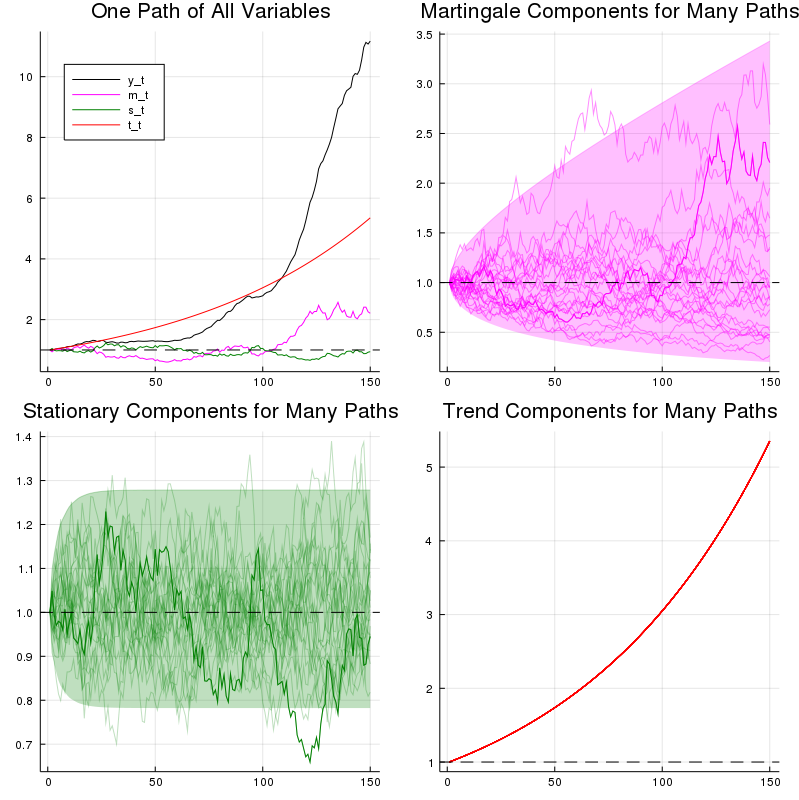

In [7]:
plt = plot_multiplicative(amf, T)
plt[1]

As before, when we plotted multiple realizations of a component in the 2nd, 3rd, and 4th panels, we also plotted population 95% confidence bands computed using the LSS type

Comparing this figure and the last also helps show how geometric growth differs from
arithmetic growth

### A peculiar large sample property

Hansen and Sargent [[HS17]](https://lectures.quantecon.org/jl/zreferences.html#hans-sarg-book-2016) (ch. 6) note that the martingale component
$ \widetilde M_t $ of the multiplicative decomposition has a peculiar property

- While $ E_0 \widetilde M_t = 1 $ for all $ t \geq 0 $,
  nevertheless $ \ldots $  
- As $ t \rightarrow +\infty $, $ \widetilde M_t $ converges to
  zero almost surely  


The following simulation of many paths of $ \widetilde M_t $ illustrates this property

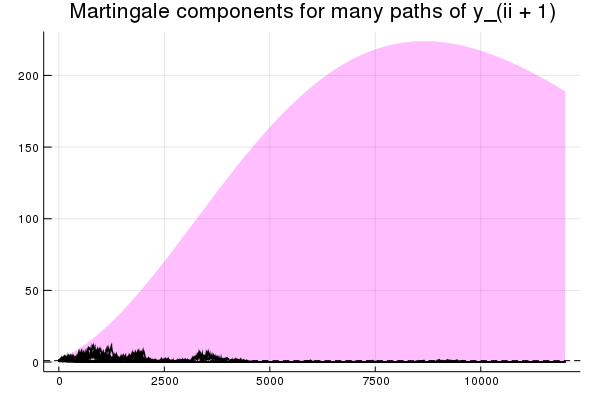

In [8]:
plt = plot_martingales(amf, 12000)
plt[1]